In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/banking-dataset-marketing-targets/test.csv
/kaggle/input/banking-dataset-marketing-targets/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [3]:
# load datas
train = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv')
test = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/test.csv')

In [4]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
# print train and test data shape
print('train set size is : ', train.shape)
print('test set size is : ', test.shape)

train set size is :  (31647, 18)
test set size is :  (13564, 17)


In [7]:
# lets see the features of train set
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
# ID coluns have no value in classification so lets drop it.

train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

In [9]:
# lets check infos of train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [10]:
train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

so **NaN** values

In [11]:
# subscribed feature is our target variabe wwe will convert it to numeric 

train['subscribed'].replace('no', 0 , inplace=True)
train['subscribed'].replace('yes', 1, inplace=True)

## Numerical and Categorical features
I will separate the data into Numerical and Categorical features.

### Numerical features

In [12]:
# numerical features
numerical_features = [cols for cols in train.columns if train[cols].dtype != 'O']
numerical_features = train[numerical_features]
numerical_features.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed
0,56,1933,19,44,2,-1,0,0
1,31,3,20,91,2,-1,0,0
2,27,891,18,240,1,-1,0,0
3,57,3287,22,867,1,84,3,1
4,31,119,4,380,1,-1,0,0


In [13]:
numerical_features.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [14]:
# correlation between independent features and dependent features
corr = train.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


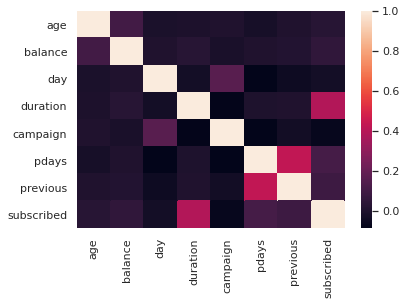

In [15]:
# correlation in heatmap
sns.heatmap(corr)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

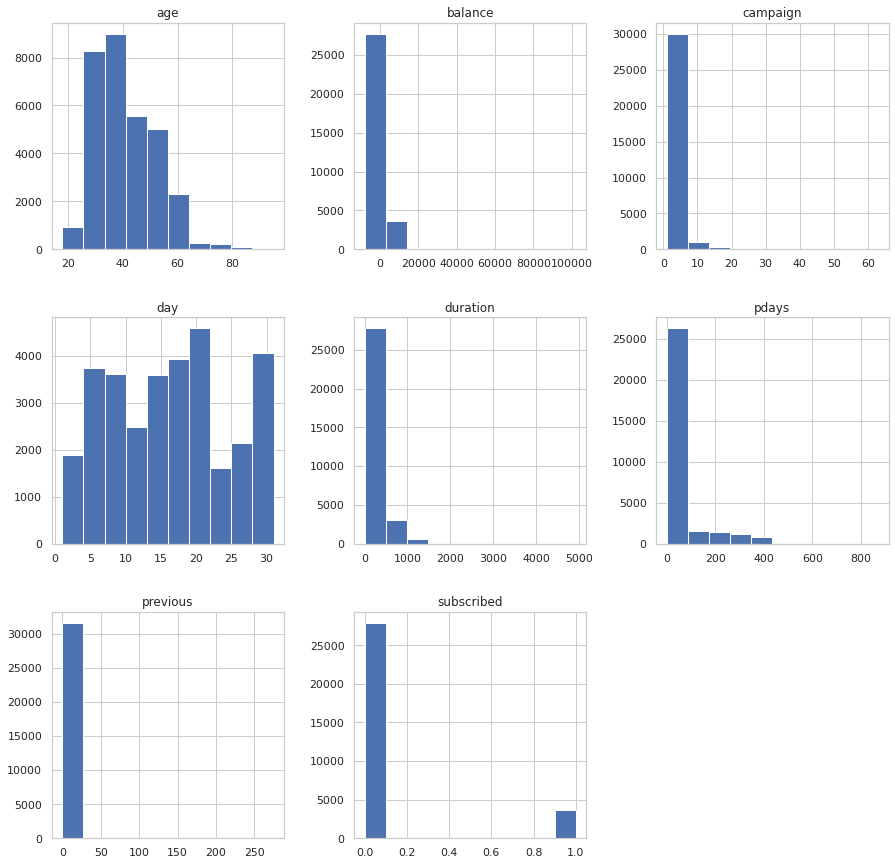

In [16]:
numerical_features.hist(figsize = (15,15))
plt.show()

### Categorical features

In [17]:
# categorical features
categorical_features = [cols for cols in train.columns if train[cols].dtype == 'O']
categorical_features = train[categorical_features]
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,unknown,no,no,no,telephone,nov,unknown
1,unknown,married,secondary,no,no,no,cellular,jul,unknown
2,services,married,secondary,no,yes,no,cellular,jul,unknown
3,management,divorced,tertiary,no,no,no,cellular,jun,success
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [18]:
print('Lets see the unique values in Categorical_features:')
print('#########################################################\n')

for feature in categorical_features:
    print('The unique values in '+ feature + " " + 'feature are:' )
    print(train[feature].unique())
    print('\n')

Lets see the unique values in Categorical_features:
#########################################################

The unique values in job feature are:
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']


The unique values in marital feature are:
['married' 'divorced' 'single']


The unique values in education feature are:
['unknown' 'secondary' 'tertiary' 'primary']


The unique values in default feature are:
['no' 'yes']


The unique values in housing feature are:
['no' 'yes']


The unique values in loan feature are:
['no' 'yes']


The unique values in contact feature are:
['telephone' 'cellular' 'unknown']


The unique values in month feature are:
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']


The unique values in poutcome feature are:
['unknown' 'success' 'failure' 'other']




#### Univariate analysis of categorical features

The figures or grapbs are self-explanatory so i will not be describing the graphs.

In [19]:
# Checking the target features
train.subscribed.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

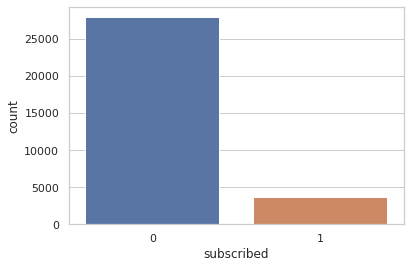

In [20]:
sns.countplot(train.subscribed)
plt.show()

above plot clearly shows the issues of **Class Imbalance.**

There are few ways to deal with such issues we will look at them later.

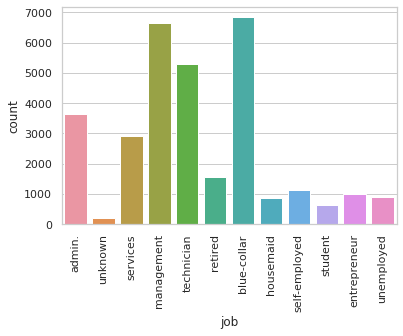

In [21]:
# Distribution of job feature
sns.countplot(train.job)
plt.xticks(rotation=90)
plt.show()

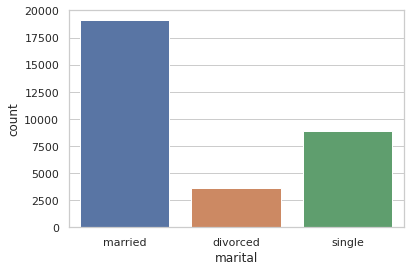

In [22]:
# Distribution of marital features
sns.countplot(train.marital)
plt.xticks(rotation=0)
plt.show()

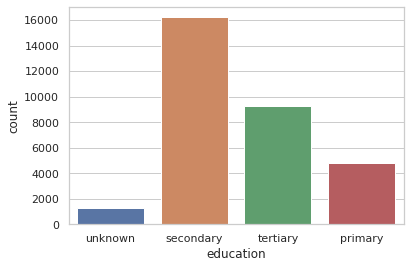

In [23]:
# Distribution of marital feature
sns.countplot(train.education)
plt.xticks(rotation=0)
plt.show()

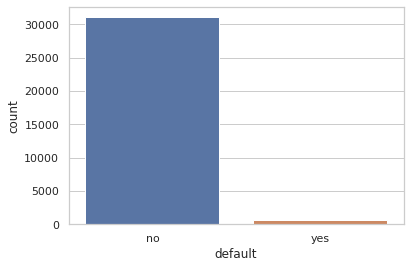

In [24]:
# Distribution of default feature
sns.countplot(train.default)
plt.xticks(rotation=0)
plt.show()

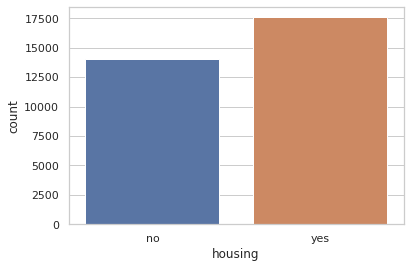

In [25]:
# Distribution of housing features
sns.countplot(train.housing)
plt.xticks(rotation=0)
plt.show()

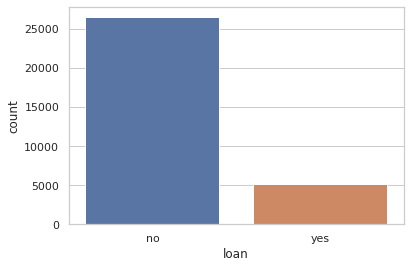

In [26]:
# Distribution of loan features
sns.countplot(train.loan)
plt.xticks(rotation=0)
plt.show()

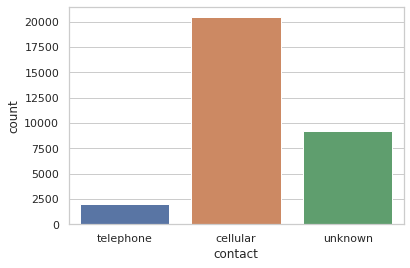

In [27]:
# Distribution of contact feature
sns.countplot(train.contact)
plt.xticks(rotation=0)
plt.show()

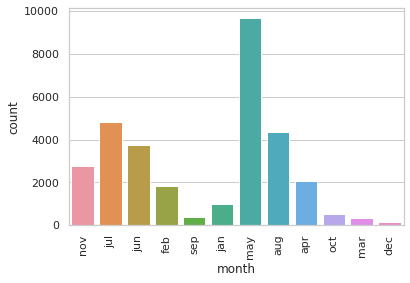

In [28]:
# Distribution of month feature
sns.countplot(train.month)
plt.xticks(rotation=90)
plt.show()

**Bivariate analysis of Categorical features with target features**.

the figures are self explanatory so i will not be describing them

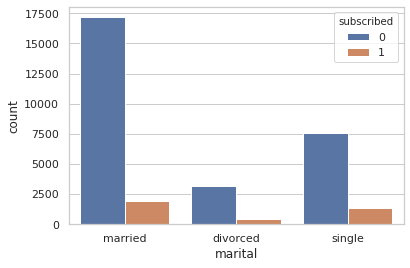

In [29]:
sns.countplot(x="marital", hue="subscribed", data=train)

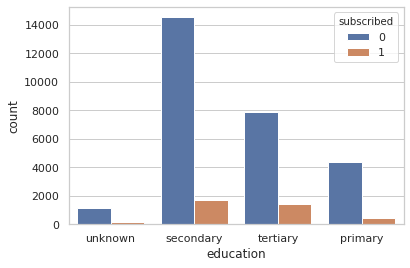

In [30]:
sns.countplot(x="education", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

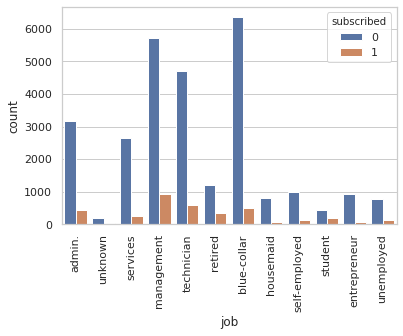

In [31]:
sns.countplot(x="job", hue="subscribed", data=train)
plt.xticks(rotation=90)
plt.show()

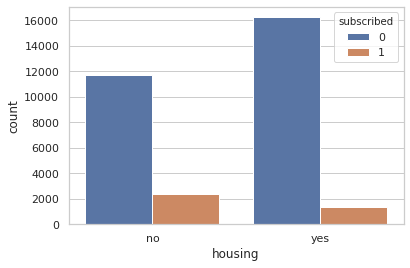

In [32]:
sns.countplot(x="housing", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

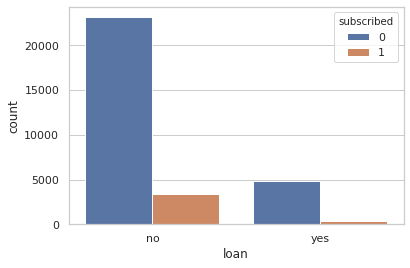

In [33]:
sns.countplot(x="loan", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

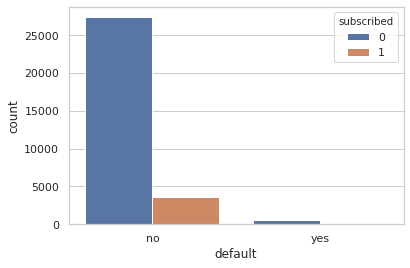

In [34]:
sns.countplot(x="default", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

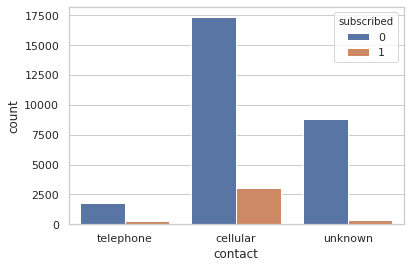

In [35]:
sns.countplot(x="contact", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

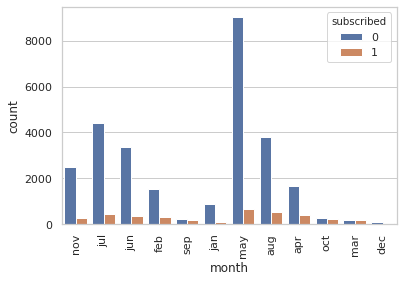

In [36]:
sns.countplot(x="month", hue="subscribed", data=train)
plt.xticks(rotation=90)
plt.show()

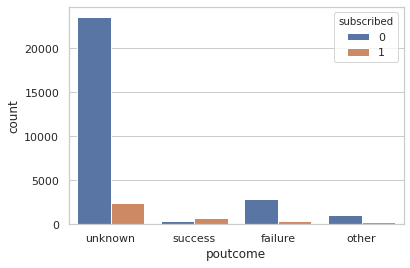

In [37]:
sns.countplot(x="poutcome", hue="subscribed", data=train)
plt.xticks(rotation=0)
plt.show()

### Combining train set and test set
WE wil combine the train and test set together and do necessary things like one **hot encoding, feature scaling** etc. The reason for combining train and test data is so that we dont need to repeat above task like one hot encoding etc for test data again.

In [38]:
# combine train adn test data together
data = pd.concat([train,test], ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [39]:
train.shape, test.shape, data.shape

((31647, 17), (13564, 16), (45211, 17))

In [40]:
data.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month,pdays,poutcome,previous,subscribed
0,56,1933,2,telephone,19,no,44,unknown,no,admin.,no,married,nov,-1,unknown,0,0.0
1,31,3,2,cellular,20,no,91,secondary,no,unknown,no,married,jul,-1,unknown,0,0.0
2,27,891,1,cellular,18,no,240,secondary,yes,services,no,married,jul,-1,unknown,0,0.0
3,57,3287,1,cellular,22,no,867,tertiary,no,management,no,divorced,jun,84,success,3,1.0
4,31,119,1,cellular,4,no,380,secondary,yes,technician,no,married,feb,-1,unknown,0,0.0


In [41]:
# checking null values
data.isna().sum()

age               0
balance           0
campaign          0
contact           0
day               0
default           0
duration          0
education         0
housing           0
job               0
loan              0
marital           0
month             0
pdays             0
poutcome          0
previous          0
subscribed    13564
dtype: int64

we can see null values in subscribed feature. If you see carefully the number of null values is exactly equal to test data. This null values is because target variable is missing in test data.

In [42]:
# lets separate newly combined data into numerical and categorical features

numerical_features = [cols for cols in data.columns if data[cols].dtype != 'O']
categorical_features = [cols for cols in data.columns if data[cols].dtype == 'O']

In [43]:
data[numerical_features].head()

,age,balance,campaign,day,duration,pdays,previous,subscribed
0,56,1933,2,19,44,-1,0,0.0
1,31,3,2,20,91,-1,0,0.0
2,27,891,1,18,240,-1,0,0.0
3,57,3287,1,22,867,84,3,1.0
4,31,119,1,4,380,-1,0,0.0


In [44]:
data[categorical_features].head()

,contact,default,education,housing,job,loan,marital,month,poutcome
0,telephone,no,unknown,no,admin.,no,married,nov,unknown
1,cellular,no,secondary,no,unknown,no,married,jul,unknown
2,cellular,no,secondary,yes,services,no,married,jul,unknown
3,cellular,no,tertiary,no,management,no,divorced,jun,success
4,cellular,no,secondary,yes,technician,no,married,feb,unknown


In [45]:
# get dummies of categorical variable. Its same as one hot encoding.
# we do this one hot encoding of categorical variables because our ML algorithms only works with numeric

cat_dummies = pd.get_dummies(data[categorical_features])
cat_dummies.head()

,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
# concat numerical features and one hot encoded features fromm above

newdata = pd.concat([data[numerical_features], cat_dummies], axis = 1)
newdata.head()

,age,balance,campaign,day,duration,pdays,previous,subscribed,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,...,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,2,19,44,-1,0,0.0,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,31,3,2,20,91,-1,0,0.0,1,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,27,891,1,18,240,-1,0,0.0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,57,3287,1,22,867,84,3,1.0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,31,119,1,4,380,-1,0,0.0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
newdata.shape

(45211, 52)

## Feature scaling

In [48]:
# create feature and target vectors

features = newdata.drop('subscribed', axis = 1)
target = newdata.subscribed


In [49]:
features.describe()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,...,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,15.806419,258.163080,40.197828,0.580323,0.647741,0.064276,0.287983,0.981973,0.018027,0.151534,0.513194,0.294198,0.041074,0.444162,0.555838,...,0.601933,0.282896,0.064851,0.138174,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,3.098021,8.322476,257.527812,100.128746,2.303441,0.477680,0.245247,0.452828,0.133049,0.133049,0.358572,0.499831,0.455687,0.198464,0.496878,0.496878,...,0.489505,0.450411,0.246266,0.345087,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,1.000000,8.000000,103.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,2.000000,16.000000,180.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,3.000000,21.000000,319.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,63.000000,31.000000,4918.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
features.shape, target.shape

((45211, 51), (45211,))

In [51]:
cols = features.columns # columns of features 

In [52]:
# scaling is done here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [53]:
# After scaling features above it is changed into ndarray. so we will change it back to Dataframe
features = pd.DataFrame(features, columns = [cols])
print(features.shape)
features.head()

(45211, 51)


,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,...,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.493506,0.090353,0.016129,0.600000,0.008947,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.168831,0.072831,0.016129,0.633333,0.018503,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.116883,0.080893,0.000000,0.566667,0.048800,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.506494,0.102646,0.000000,0.700000,0.176291,0.097477,0.010909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.168831,0.073884,0.000000,0.100000,0.077267,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
features.describe()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,...,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.028449,0.493547,0.052494,0.047245,0.002110,0.647741,0.064276,0.287983,0.981973,0.018027,0.151534,0.513194,0.294198,0.041074,0.444162,0.555838,...,0.601933,0.282896,0.064851,0.138174,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478
std,0.137906,0.027643,0.049968,0.277416,0.052364,0.114827,0.008376,0.477680,0.245247,0.452828,0.133049,0.133049,0.358572,0.499831,0.455687,0.198464,0.496878,0.496878,...,0.489505,0.450411,0.246266,0.345087,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.000000,0.233333,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076871,0.016129,0.500000,0.036600,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085768,0.032258,0.666667,0.064864,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# lets add subscribed to our features 
features['subscribed'] = target

In [56]:
features.head()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,...,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,0.493506,0.090353,0.016129,0.600000,0.008947,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.168831,0.072831,0.016129,0.633333,0.018503,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.116883,0.080893,0.000000,0.566667,0.048800,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.506494,0.102646,0.000000,0.700000,0.176291,0.097477,0.010909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.168831,0.073884,0.000000,0.100000,0.077267,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Now i will separate the train and test data which we we cobined above.**

In [57]:
# separate traina dnd test data

train2 = features.iloc[:31647]
test2 = features.iloc[31647:]
train2.shape, test2.shape

((31647, 52), (13564, 52))

In [58]:
# drop target feature from test data
test2.drop('subscribed', axis = 1, inplace = True)
print(test2.shape)

(13564, 51)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
train2.head()

,age,balance,campaign,day,duration,pdays,previous,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,...,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,0.493506,0.090353,0.016129,0.600000,0.008947,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.168831,0.072831,0.016129,0.633333,0.018503,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.116883,0.080893,0.000000,0.566667,0.048800,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.506494,0.102646,0.000000,0.700000,0.176291,0.097477,0.010909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.168831,0.073884,0.000000,0.100000,0.077267,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model building and Evaluation
I will build classification models for our data and perform evaluation

In [60]:
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Define feature and target vectors

In [61]:
# Define feature and target vectors
x = train2.iloc[:,:-1]
y = train2.iloc[:,-1]
x.shape, y.shape

((31647, 51), (31647,))

In [62]:
# split data into train and test set

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

### 1. Logistic Regression

In [63]:
# model creation
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# predict result for x_test

y_pred = logreg.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
# check model accuracy

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8983


In [66]:
# check training set accuracy

y_pred_train = logreg.predict(x_train)
y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9012


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9012
Test set score: 0.8983


In [68]:
# predicting target class for unseen test data.
# this data is test.csv given by kaggle

y_pred_test2 = logreg.predict(test2)
y_pred_test2

array([0., 0., 0., ..., 0., 1., 0.])

In [69]:
df_y_pred_test2 = pd.DataFrame(y_pred_test2, columns = ['test2pred'])
df_y_pred_test2.head()

,test2pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [70]:
df_y_pred_test2['test2pred'].unique()

array([0., 1.])

In [71]:
df_y_pred_test2['test2pred'].value_counts()

0.0    12804
1.0      760
Name: test2pred, dtype: int64

In [72]:
# confusion matrix and classification report

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix: \n ', cm)
print('\n')
print('classification report: \n ', classification_report(y_test,y_pred))

confusion matrix: 
  [[8160  192]
 [ 774  369]]


classification report: 
                precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8352
         1.0       0.66      0.32      0.43      1143

    accuracy                           0.90      9495
   macro avg       0.79      0.65      0.69      9495
weighted avg       0.88      0.90      0.88      9495



Holyshit!!! Our accuracy is **0.90** but look at the recall value of minority calss 1, it just only **0.32**.

All the best accuracy score that we got above turns out to be **LIES**. You can also see the prediction in unseen test data **test2**(given by kaggle) gives much priority to majority class **0** 

Why so? These all is due to **class imbalance** 

### Over-sampling of minority class observation

It means we will randomly replicate minority class observation until it becomes actionablely proportional to majority class observation.

In [73]:
y.value_counts()

0.0    27932
1.0     3715
Name: (subscribed,), dtype: int64

In [74]:
from sklearn.utils import resample

# separate the maority and minority class observation
data_major = train2[y == 0.0]
data_minor = train2[y == 1.0]

# over-sample the minority class observations
data_minor_oversample = resample(data_minor, replace = True, n_samples=27932, random_state = 0)

# finally combine the majority class observation and oversampled minoiry class observation
data_oversampled = pd.concat([data_major, data_minor_oversample])

In [75]:
# class label count after oversampled.we will see that minoity class now is proportionate to majority class
data_oversampled.iloc[:,-1].value_counts()

1.0    27932
0.0    27932
Name: (subscribed,), dtype: int64

In [76]:
# again lets splt our over samoled data into feature and traget variables
X = data_oversampled.iloc[:,:-1]
Y = data_oversampled.iloc[:,-1]

# lets split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

# model building
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

# Lets evaluate our model
y_pred_train = logreg.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print("Accuracy score: ", accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Training-set accuracy score: 0.8355
Accuracy score:  0.8275656324582339


[[7100 1321]
 [1569 6770]]


              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      8421
         1.0       0.84      0.81      0.82      8339

    accuracy                           0.83     16760
   macro avg       0.83      0.83      0.83     16760
weighted avg       0.83      0.83      0.83     16760



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


here our accuracy comes out be **0.83** which is less than previous accuracy score but this model have one good thing and thats recall value of minority class 1 which is **0.81** more improved than previous model whose recall value was **0.32**.

This model shows a slight case of **overfitting** but the train and test set accuracies are almost comparable. Even than if we want to reduce this overfitting we can **tune hyperparameter** which i will not be doing here

### I have stopped my notebook here but we can still test our data on other classification algorithms. There are many more techniques with wich we can improve our model performance.